This project uses public data from Pew Research Center's ["Information Engaged and Information Wary"](http://www.pewinternet.org/dataset/sept-29-nov-6-2016-information-engaged-and-information-wary/) survey.

Pew Research Center bears no responsibility for interpretations presented or conclusions reached based on analysis of the data.

#### Problem setup
---------------

Our client, edugames.org, is a fictional but plausible company that is interested in creating online mathematical puzzle-solving games for seniors. They have traditionally created sudoku puzzles and other physical media, but are interested in creating a new offering for seniors in the online space. Their hope is that this new product will offer an enjoyable avenue for intellectual engagement and growth during one's professional retirement. 

The current thinking is that the game could be a mobile app as well as a web application, with a mobile first design and social media integration. They are curious if a mobile-first online game can find traction with a senior demographic. They are also curious if this may vary amongst segments of the senior population. In order to study this, they want to gain a general sense of the level of eagerness//skepticism that senior citizens hold towards online media.

Can they expect irrational exuberance or should they anticipate a cautiously optimistic audience? We can expect growth mindset to correlate with the desire to engage with an educational product. Can we find a demographic subset that demonstrates growth mindset as well as a high degree of willingness to engage with technology?

#### The Plan
---------------

We will begin by conveying the implications to the problem already explored in Pew's 2017 report on technology usage amongst seniors.

We will then conduct EDA phase 1 by plotting the distributions of survey responses for senior respondents and the general population, looking for strong trends to gain directional insight into obstacles and opportunities in the senior market. 

Plan A:

Feature Engineering & Supervised Analysis:

We will then conduct a Feature Engineering and Correlation Analysis Phase. The goal will be to prepare the data for a regression analysis between demographic covariates and the idealized "goodness of customer fit" score. The score will be based on a priori assumptions of what survey responses indicate good fit to the product. This will be a weighted sum of subgroupings of the survey response variables.

The subgrouping will be single variables that encapsulate a single qualitative dimension of the customer-fit picture, such as like "growth mindset", "openness to information", etc. These will be initially scaled to be of equal range. I will try to avoid over-weighting strongly correlated contributors to the final score by looking at the correlation and pairplot matrices between these variables. 

With the target variable engineering complete, I will then look at the cross-correlation between the demographic covariates and the correlation between demographic variables and the target. I will try to find a near-orthogonal basis for the feature space that is interpretable as well as predictive. I will favor demographic features that are more easily used and understood in the marketing process.

Plan B:

Un-supervised Analysis:

If Plan A is unsuccessful, then we will use the results of the cluster analysis from Pew’s initial study of the entire population to guide an unsupervised analysis of the senior population - focusing on finding distinct behavioral sub-groups. Do these vary in character or in distribution from pew's study?

This will entail an Unsupervised Analysis:
* Finding the intrinsic dimensionality of the survey response subgroups (from supervised section) with PCA
* Looking for behavioral sub-groups of seniors with Non-Negative Matrix Factorization of the survey response matrix.
* Looking for sub-groups of seniors with cluster analysis, beginning with K-Means and Agglomerative Clustering and projecting the results of this into 2d visualizations with t-SNE or PCA. Apply various clustering methods, then move to most promising results.
    * I will use known methods to choose the best k or neighborhood size for each clustering model.
    * I will look for consensus across a few clustering methods to validate the results. 
 
* I will then plot responses per cluster and begin looking for qualitative explanations and demographic correlates to the clustering, focusing on those explanations most relevant to receptivity to an online game.

Summary and Recommendations:

* I will frame the findings in terms of their relevance to the game, using verbal, numerical, and graphical arguments from modeling and EDA to explore the implications for marketing to certain sub-groups of seniors. 

* I will summarize the findings in a concrete set of Go/No Go recommendations for marketing the product to various groups.


#### General Senior Technology Adoption Insights
---------------

This section distills insights to this problem from [Pew's Report on Senior Tech Adoption](http://www.pewinternet.org/2017/05/17/tech-adoption-climbs-among-older-adults/). See the report for greater detail on the insights below.


According to Pew's Report,

##### Seniors make up a substantial and growing portion of the population.
* Seniors (65+) make up 15% of the population- about 46 million people.
* The share of seniors is projected to increase to 22% by 2025.

##### Tech adoption for seniors is growing in step with the general population, especially for younger, wealthier, and college educated seniors.
* Growth in internet, broadband, smartphone, tablet, and social media adoption amongst seniors closely mirrors the high rate of growth in the general population.
* The total rate of adoption of these technologies varies from about 1/2 to 2/3 that of the general population.
* Younger, wealthier, and college educated seniors show higher rates of tech adoption in terms of internet, broadband, smartphone, tablet, and social media adoption. 
* 40% of seniors own smart phones
* 25% of seniors play online games.

##### Seniors who adopt internet and device usage have high levels of engagement.
* 75% of internet using seniors go online daily.
* 76% of smart-phone owning seniors use the internet multiple times per day.


The report on Senior Tech Adoption uses data from the survey on information engagedness and warniness as well as two additional surveys- a 2016 survey on senior confidence in independent device usage and a 2015 survey on frequency of internet usage [Methodology and Data Sources](http://www.pewinternet.org/2017/05/17/older-americans-tech-methodology/).

[Another useful study on video games](http://www.pewinternet.org/2015/12/15/attitudes-about-video-games/)

#### Data Cleaning and Validation for Information Engagement/Wariness Survey
---------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("data/September 29 - November 6, 2016 - Information engaged wary - CSV.csv")

print(data.isnull().any().any(),'\n')

#set empty strings to null
data.replace(r'^\s*$', 100, regex=True, inplace = True)

#print(data.columns[data.isnull().any()].tolist())

null_cats = ['qs1', 'home3nw', 'bbhome1', 'bbhome2', 'device1a', 
 'smart1', 'smart2', 'snsint2', 'q4c', 'q4d', 'q5', 'q6b', 
 'libmob', 'oftvote', 'kidage1', 'race3m2', 'race3m3', 
 'race3m4', 'birth_hisp', 'partyln', 'hh3', 'ql1a', 'qc1']

null_cats_dict = {i:'int64' for i in null_cats}

data = data.astype(null_cats_dict)

False 



There are no null values in the data.

There are some questions that are only asked if certain responses are given to a prior question, these have some empty string entries.

Should we pay attention to the race follow up questions?
13 out of 707 senior responses have a second race.
Of these, the first race tends to be white and the second race tends to be native american.
This won't factor in much to our analysis for now.

In [2]:
mask = data['age'] > 65

grp = data[~ data['race3m2'].isnull() & mask].groupby('race3m1').count()
print(grp['sample'],'\n')
grp = data[~ data['race3m2'].isnull() & mask].groupby('race3m2').count()
print(grp['sample'])

race3m1
1    602
2     52
3      6
4      1
5     13
7     12
8      4
9     17
Name: sample, dtype: int64 

race3m2
2        1
5       12
100    694
Name: sample, dtype: int64


Taking a useful subset:

Disregard HISP/birth Hisp?

HISP should redundant with race but may not be. Let's check if hisp always = 1 when race = 7.

Birth hisp should only have as many answers as hisp =1 or race = 7.

###### Dealing with Weighting

Pew surveys include a weight variable intended to scale up or down each response in order to summarically match the general population:

http://www.pewresearch.org/methodology/u-s-survey-research/our-survey-methodology-in-detail/#data-weighting

http://www.applied-survey-methods.com/weight.html

In [3]:
#comparison of count to weighted sum for 2 variables.

grp = data[mask].groupby(by='live1')['standwt'].sum()
print(grp,'\n')

grp = data[mask].groupby(by='live1')['weight'].sum()
print(grp,'\n')

grp = data[mask].groupby(by='live1')['sample'].count()
print(grp)

# Let's confirm that the standard weight parameter is intended to preserve the relative weights 
# while scaling to the magnitude of the sample size (rather than an arbitrary magnitude).

print(data['standwt'].sum(),'\n')
print(data['weight'].sum(),'\n')
print(data.shape,'\n')

print((data['weight']*(data.shape[0]/data['weight'].sum())).head(),'\n')

print(data['standwt'].head())

# It looks to be so.


live1
1     98.356542
2     87.236087
3    201.626773
4    128.945551
8      3.227518
Name: standwt, dtype: float64 

live1
1    279.647059
2    248.029412
3    573.264706
4    366.617647
8      9.176471
Name: weight, dtype: float64 

live1
1    125
2    129
3    270
4    177
8      6
Name: sample, dtype: int64
3014.9983448625703 

8572.23529411765 

(3015, 117) 

0    0.786191
1    0.362062
2    1.065495
3    0.920671
4    1.737895
Name: weight, dtype: float64 

0    0.786190
1    0.362061
2    1.065495
3    0.920670
4    1.737894
Name: standwt, dtype: float64


In [8]:
#Create a variable with the weighting normalized for seniors and non-seniors.
# This is specifically for categorically comparing seniors and non-seniors
# directly.

seniors = data[mask].copy()
non_seniors = data[~ mask].copy()
seniors['senwt'] = 1+seniors['standwt']-seniors['standwt'].mean()
non_seniors['senwt'] = 1+non_seniors['standwt']-non_seniors['standwt'].mean()

senwt = seniors['senwt'].append(non_seniors['senwt'])
senwt = senwt*(len(senwt)/sum(senwt))

data['senwt'] = senwt

## Exploratory Data Analysis of Information Engagement/Wariness Survey
---------------

###### There is a smooth decline in the number of seniors by age in the weighted sample.

The small anomaly around 99+ may represent a ceiling effect (the value was capped here.) It may also represent a few false reponses.

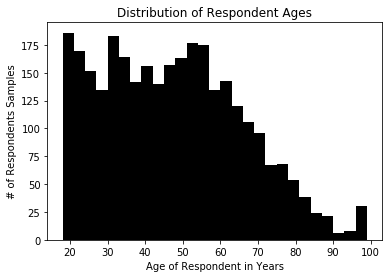

In [9]:
# Need to incorporate weighting into this histogram
plt.hist(data['age'],color='black',weights=data['standwt'],bins=int(np.sqrt(data.shape[0])/2))
plt.title('Distribution of Respondent Ages')
plt.xlabel('Age of Respondent in Years')
plt.ylabel('# of Respondents Samples')
plt.show()

###### Seniors make up about 23% of the non-weighted sample.

Non-Seniors: 2308
Seniors: 707
Seniors are 0.23449419568822555 / 1 of the total sample


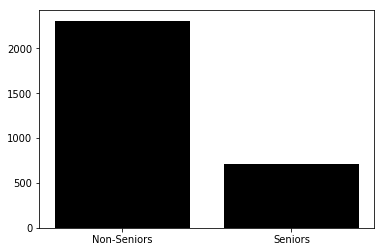

In [10]:
mask = data['age'] > 65
num_seniors = data[mask]['standwt'].count()
num_other = data[~ mask]['standwt'].count()

plt.bar(left=[0,1],
        height=[num_seniors,num_other][::-1],
        tick_label=['Seniors','Non-Seniors'][::-1],
        color="black")

print("Non-Seniors: {}".format(num_other))
print("Seniors: {}".format(num_seniors))
print("Seniors are {} / 1 of the total sample".format(num_seniors/(num_other+num_seniors)))

plt.show()

###### Let's look at the demographics we expect to be relevant.

In [41]:
mask = data['age'] > 65

well_map = {1:'Very Well',2:'Somewhat Well',3:'Not too well',4:'Not at all well'}
q4_map = {1:'A lot',2:'Some',3:'Not too much',4:'Not at all'}
q5_map = {1:'Not Often',2:'Occassional',3:'Frequently'}
q8_map = {1:'Useful',2:'Stressful'}
yn_map = {1:'Yes',2:'No'}
num_map = {1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7'}

cat_value_maps = {
    'live1':{1:'Urban',2:'Suburb',3:'Town',4:'Rural'},
    'sex':{1:'Male',2:'Female'},
    'marital':{1:'Married',2:'Partner',3:'Divorce',
               4:'Separated',5:'Widowed',6:'Single'},
    'par':yn_map,
    'educ2':{1:'< h_school',2:'hs_inc',3:'hs_grad',4:'col_inc',5:'col_2yr',6:'col_4yr',7:'grad_inc',8:'grad'},
    'emplnw':{1:'full_time',2:'part_time',3:'retired',4:'unemployed',5:'self_emp',6:'disabled',7:'student'},
    'disa':yn_map,
    'race3m1':{1:'White',2:'Black',3:'Asian',4:'Other',5:'Native_Am',6:'Pacific_Isl',7:'Hispanic'},
    'party':{1:'Republican',2:'Democrat',3:'Independent',4:'No_Pref',5:'Other'},
    'ideo':{1:'Very Con',2:'Con',3:'Moderate',4:'Lib',5:'Very Lib'},
    'hh1':num_map,
    'q2a':well_map,
    'q2b':well_map,
    'q2c':well_map,
    'q2d':well_map,
    'q2e':well_map,
    'q3a':yn_map,
    'q3b':yn_map,
    'q3c':yn_map,
    'q3d':yn_map,
    'q3e':yn_map,
    'q3f':yn_map,
    'q4a':q4_map,
    'q4b':q4_map,
    'q4c':q4_map,
    'q4d':q4_map,
    'q4e':q4_map,
    'q4f':q4_map,
    'q4g':q4_map,
    'q5':q5_map,
    'q7a':well_map,
    'q7b':well_map,
    'q7c':well_map,
    'q7d':well_map,
    'q8':q8_map,
    'eminuse':yn_map,
    'intmob':yn_map,
    'home3nw':yn_map,
    'bbhome1':{1:'Dial-up',2:'High-speed',3:'Both',4:'Mobile Only',5:'None'},
    'bbhome2':yn_map,
    'device1a':yn_map,
    'device1b':yn_map,
    'device1c':yn_map,
    'device1d':yn_map,
    'smart1':yn_map,
    'smart2':yn_map,
    'snsint2':yn_map,
    'devicehha':num_map,
    'devicehhb':num_map,
    'devicehhc':num_map,
    'devicehhd':num_map,
    }
cat_title_map = {
    'live1':'Location',
    'par':'Currently Parenting',
    'educ2':'Education',
    'emplnw':'Employment',
    'disa':'Disability',
    'inc':'Income',
    'race3m1':'Race',
    'ideo':'Idealogy',
    'hh1':'Household Members',
    'q2a':'Intelligence Fixed',
    'q2b':'Music Talent Non-fixed',
    'q2c':'Hard Work Instrumental',
    'q2d':'Intelligence > Hard Work',
    'q2e':'People Fixed',
    'q3a':'Novelty Stressful',
    'q3b':'Feedback Appreciated',
    'q3c':'Opposing Data Considered',
    'q3d':'Information Sought',
    'q3e':'Beliefs Fixed',
    'q3f':'Novelty Adapted To',
    'q4a':'More Computer Training Helpful',
    'q4b':'More Info-savvy Friends Helpful',
    'q4c':'More Reliable Net Service Helpful',
    'q4d':'Unlimited Data Plan Helpful',
    'q4e':'Closer Library Helpful',
    'q4f':'More Library Hours Helpful',
    'q4g':'Reliable Info Training Helpful',
    'q5':'Need Help Getting Info Online',
    'q7a':'Multi-tasker',
    'q7b':'Easy to Relax',
    'q7c':'Current Life Pace Harmful',
    'q7d':'Usually Patient in Queue',
    'q8':'Information Availability Useful/Stressful',
    'eminuse':'Email/Net Use',
    'intmob':'Mobile Net Use',
    'home3nw':'Home Net Use',
    'bbhome1':'Has Broadband',
    'bbhome2':'Dial-up Check',
    'device1a':'Has Cellphone',
    'device1b':'Has E-Reader',
    'device1c':'Has Tablet',
    'device1d':'Has Desktop/Laptop',
    'smart1':'Has Smartphone',
    'smart2':'Has Smartphone 2',
    'snsint2':'Uses Social Media',
    'devicehha':"Household # Smartphones",
    'devicehhb':"Household # Tablets",
    'devicehhc':"Household # Computers",
    'devicehhd':"Household # Streaming Device",
}
demo_categoricals = ['live1','sex','marital','par','educ2','emplnw','disa','race3m1','party','ideo','hh1']
q2_categoricals = ['q2a','q2b','q2c','q2d','q2e']
q3_categoricals = ['q3a','q3b','q3c','q3d','q3e','q3f']
tech_categoricals = ['eminuse','intmob','home3nw','bbhome1','bbhome2','device1a','device1b','device1c',
    'device1d','smart1','smart2','snsint2','devicehha','devicehhb','devicehhc','devicehhd']
test_categoricals = ['devicehha']
ttc_categoricals = ['q4a','q4b','q4c','q4d','q4e','q4f','q4g','q5','q7a','q7b','q7c','q7d','q8']

def cat_compare_chart(data,mask,categoricals,
                                 cat_value_maps,cat_title_map):
    '''
    Compare seniors to the general population across a variety of categorical variables
    by creating side-by-side bar charts with accumulated standardized weight per category.
    '''
    
    for c in categoricals:
        
        # Create a mask to remove non-responders
        nr_mask = data[c] < 8
        
        #set ticks
        ticks = list(cat_value_maps[c].keys())
        tick_labels = list(cat_value_maps[c].values())
        
        #Map title variable to appropriate word if designated in map.
        title_var = cat_title_map.get(c) or c.capitalize()
             
        f, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))
        
        grp = data[nr_mask & mask].groupby(by=c)['senwt'].sum()
        ax1.bar(grp.index,grp.values,color="blue")
        ax1.set_title('Senior {} Distribution'.format(title_var))
        ax1.set_xlabel(title_var)
        ax1.set_ylabel('Number of People')
        ax1.set_xticks(ticks)
        ax1.set_xticklabels(tick_labels,rotation=45)

        grp_2 = data[nr_mask].groupby(by=c)['senwt'].sum()
        ax2.bar(grp_2.index,grp_2.values,color="red")
        ax2.set_title('General {} Distribution'.format(title_var))
        ax2.set_xlabel(title_var)
        ax2.set_ylabel('Number of People')
        ax2.set_xticks(ticks)
        ax2.set_xticklabels(tick_labels,rotation=45)

        plt.tight_layout()
        plt.show()
        
def cat_compare_closer(data,mask,categoricals,cat_value_maps,cat_title_map):
    '''
    Compare each categorical response with side-by-side bars
    Whose height is the mean of bootstrap sub-samples of equal size 
    and error bars are equal to the 95% confidence interval for the mean.
    '''
    for c in categoricals:
        
        # Create a mask to remove non-responders
        nr_mask = data[c] < 8
        
        #set ticks
        width = 0.40
        ticks = np.array(list(cat_value_maps[c].keys()))+(width/2)
        tick_labels = list(cat_value_maps[c].values())
        
        #Map title variable to appropriate word if designated in map.
        title_var = cat_title_map.get(c) or c.capitalize()

        #Perform the bootstrap
        grps_s = []
        grps_g = []
        samples = 1000
        n = 500

        for i in range(samples):
            sample_s = data[nr_mask & mask].sample(n,replace=True)
            sample_g = data[nr_mask & (~ mask)].sample(n,replace=True)
            grps_s.append(sample_s.groupby(by=c)['senwt'].sum())
            grps_g.append(sample_g.groupby(by=c)['senwt'].sum())

        m_s = np.mean(grps_s,axis=0)
        conf_s = np.std(grps_s,axis=0)*1.96
        m_g = np.mean(grps_g,axis=0)
        conf_g = np.std(grps_g,axis=0)*1.96

        f, ax = plt.subplots(1,1,figsize=(8,4))

        ind = np.arange(1,len(m_g)+1)
        if(len(m_s) < len(m_g)):
            for i in range(len(m_g)-len(m_s)):
                m_s = np.append(m_s,0)
                conf_s = np.append(conf_s,0)
        
        rects1 = ax.bar(left=ind,height=m_s,width=width,yerr=conf_s,color='blue')
        rects2 = ax.bar(left=ind+width,height=m_g,width=width,yerr=conf_g,color='red')
        ax.set_title('{} Distribution for n={}'.format(title_var,str(n)))
        ax.set_xlabel(title_var)
        ax.set_ylabel('Number of People')
        ax.set_xticks(ticks)
        ax.set_xticklabels(tick_labels,rotation=45)
        ax.legend((rects1[0], rects2[0]), ('Seniors', 'Non Seniors'))

        plt.show()

###### Demographic Observations

break these out to their appropriate charts in the presentation

* Seniors have a substantially lower portion of college attendees and graduates than the general population. Note what fraction attended college.
* As expected, seniors are much more likely to be retired than working full or part-time.
* Seniors have a higher rate of disability than the general population.
* The sampled senior race distribution (drawn only from the first reported race), tends to have fewer black, Asian, native American, and Hispanic members than the general population. This will be a limitation in our analysis. Though the race distribution looks like non-whites might be under-represented in the general population, this is actually fairly coherent with the overall distribution as per the census. https://www.infoplease.com/us/race-population/population-united-states-race-and-hispaniclatino-origin-census-2000-and-2010
* Senior political idealogy is only slightly more right-leaning than the overall population and tends to be a bit more partisan.
* Seniors tend to have fewer household members, a fact to consider when thinking of how the social impact of the game might work for them.

Of the topics covered in the survey, the ones we have the keenest interest in are:

* Outlook on Learning and Growth - This will reflect "growth mindset"
* Technology Engagement + Assets - Potential users will already have devices, and probably use the internet regularly.
* Trust, Tools, and Constraints - Potential users will probably need help using devices less often (Q5)
* Time & Attention - Do seniors have time in their day and mental energy for a new hobby?

We'll begin by looking at the distributions to the responses to these questions. We can then look to see how strongly the responses we're interested in correlate. We'll then want to look for demographic correlates to favorable answers to these survey questions.

We expect younger, more educated, and wealthier seniors to have more devices, display more of a growth mindset, and need less help using devices. We'll play the skeptic towards these expectations. We don't know who will have more time or focus.

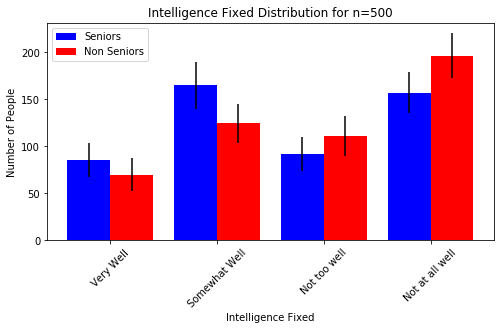

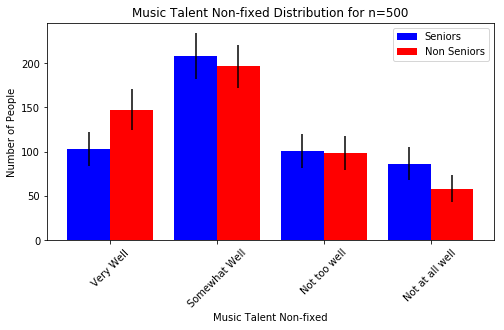

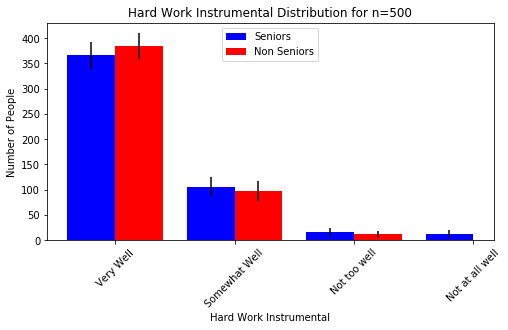

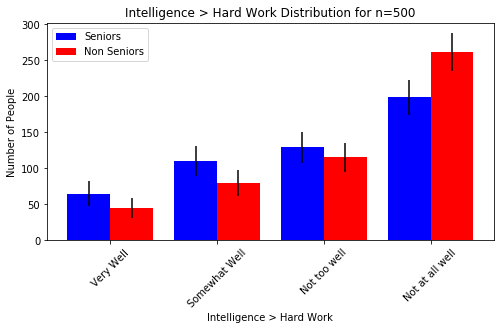

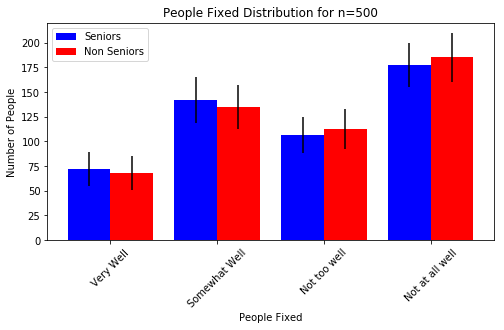

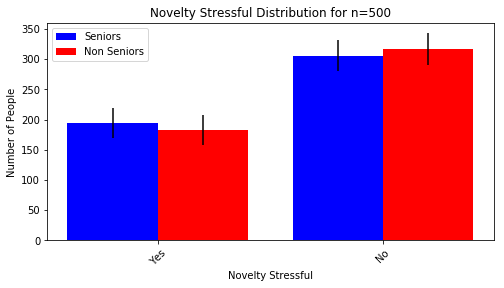

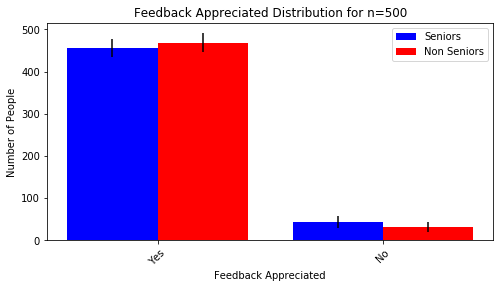

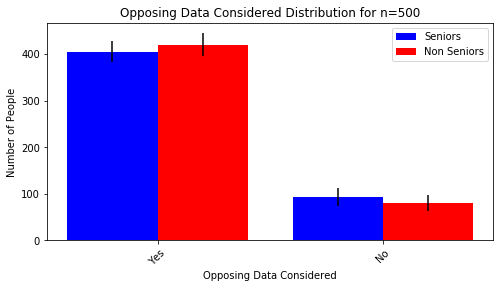

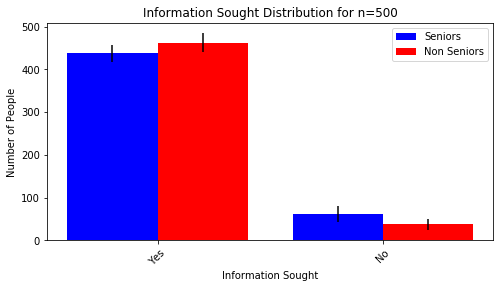

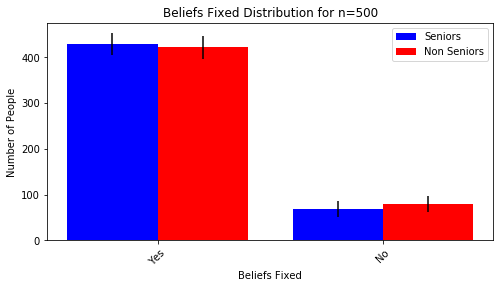

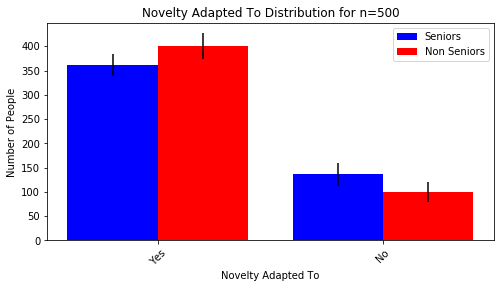

In [45]:
#Adding error bars: https://stackoverflow.com/questions/45718750/how-to-add-error-bars-to-a-bar-plot-in-matplotlib-by-specifying-a-lower-and-uppe

#cat_compare_closer(data,mask,demo_categoricals,cat_value_maps,cat_title_map)
cat_compare_closer(data,mask,q2_categoricals,cat_value_maps,cat_title_map)
cat_compare_closer(data,mask,q3_categoricals,cat_value_maps,cat_title_map)
#cat_compare_closer(data,mask,tech_categoricals,cat_value_maps,cat_title_map)
#cat_compare_closer(data,mask,['q5'],cat_value_maps,cat_title_map)